In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [7]:
df = pd.read_csv("Crop_recommendation.csv")

In [8]:
df[df["label"] == 'rice'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [10]:
df.shape

(2200, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
num_columns = df.select_dtypes(exclude="object")

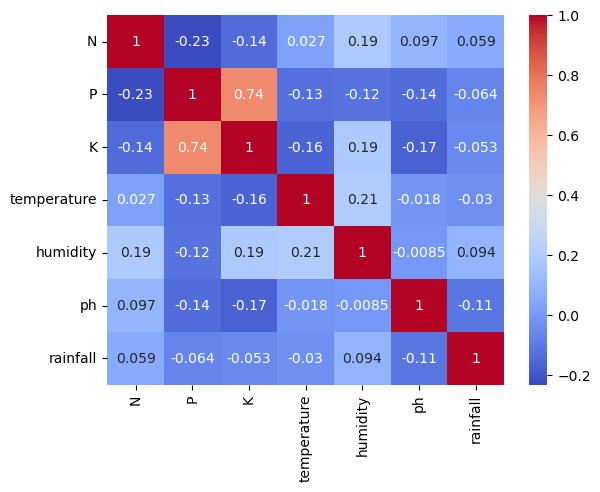

In [14]:
sns.heatmap(num_columns.corr(),annot=True,cmap="coolwarm")
plt.show()

# Outliers Removal

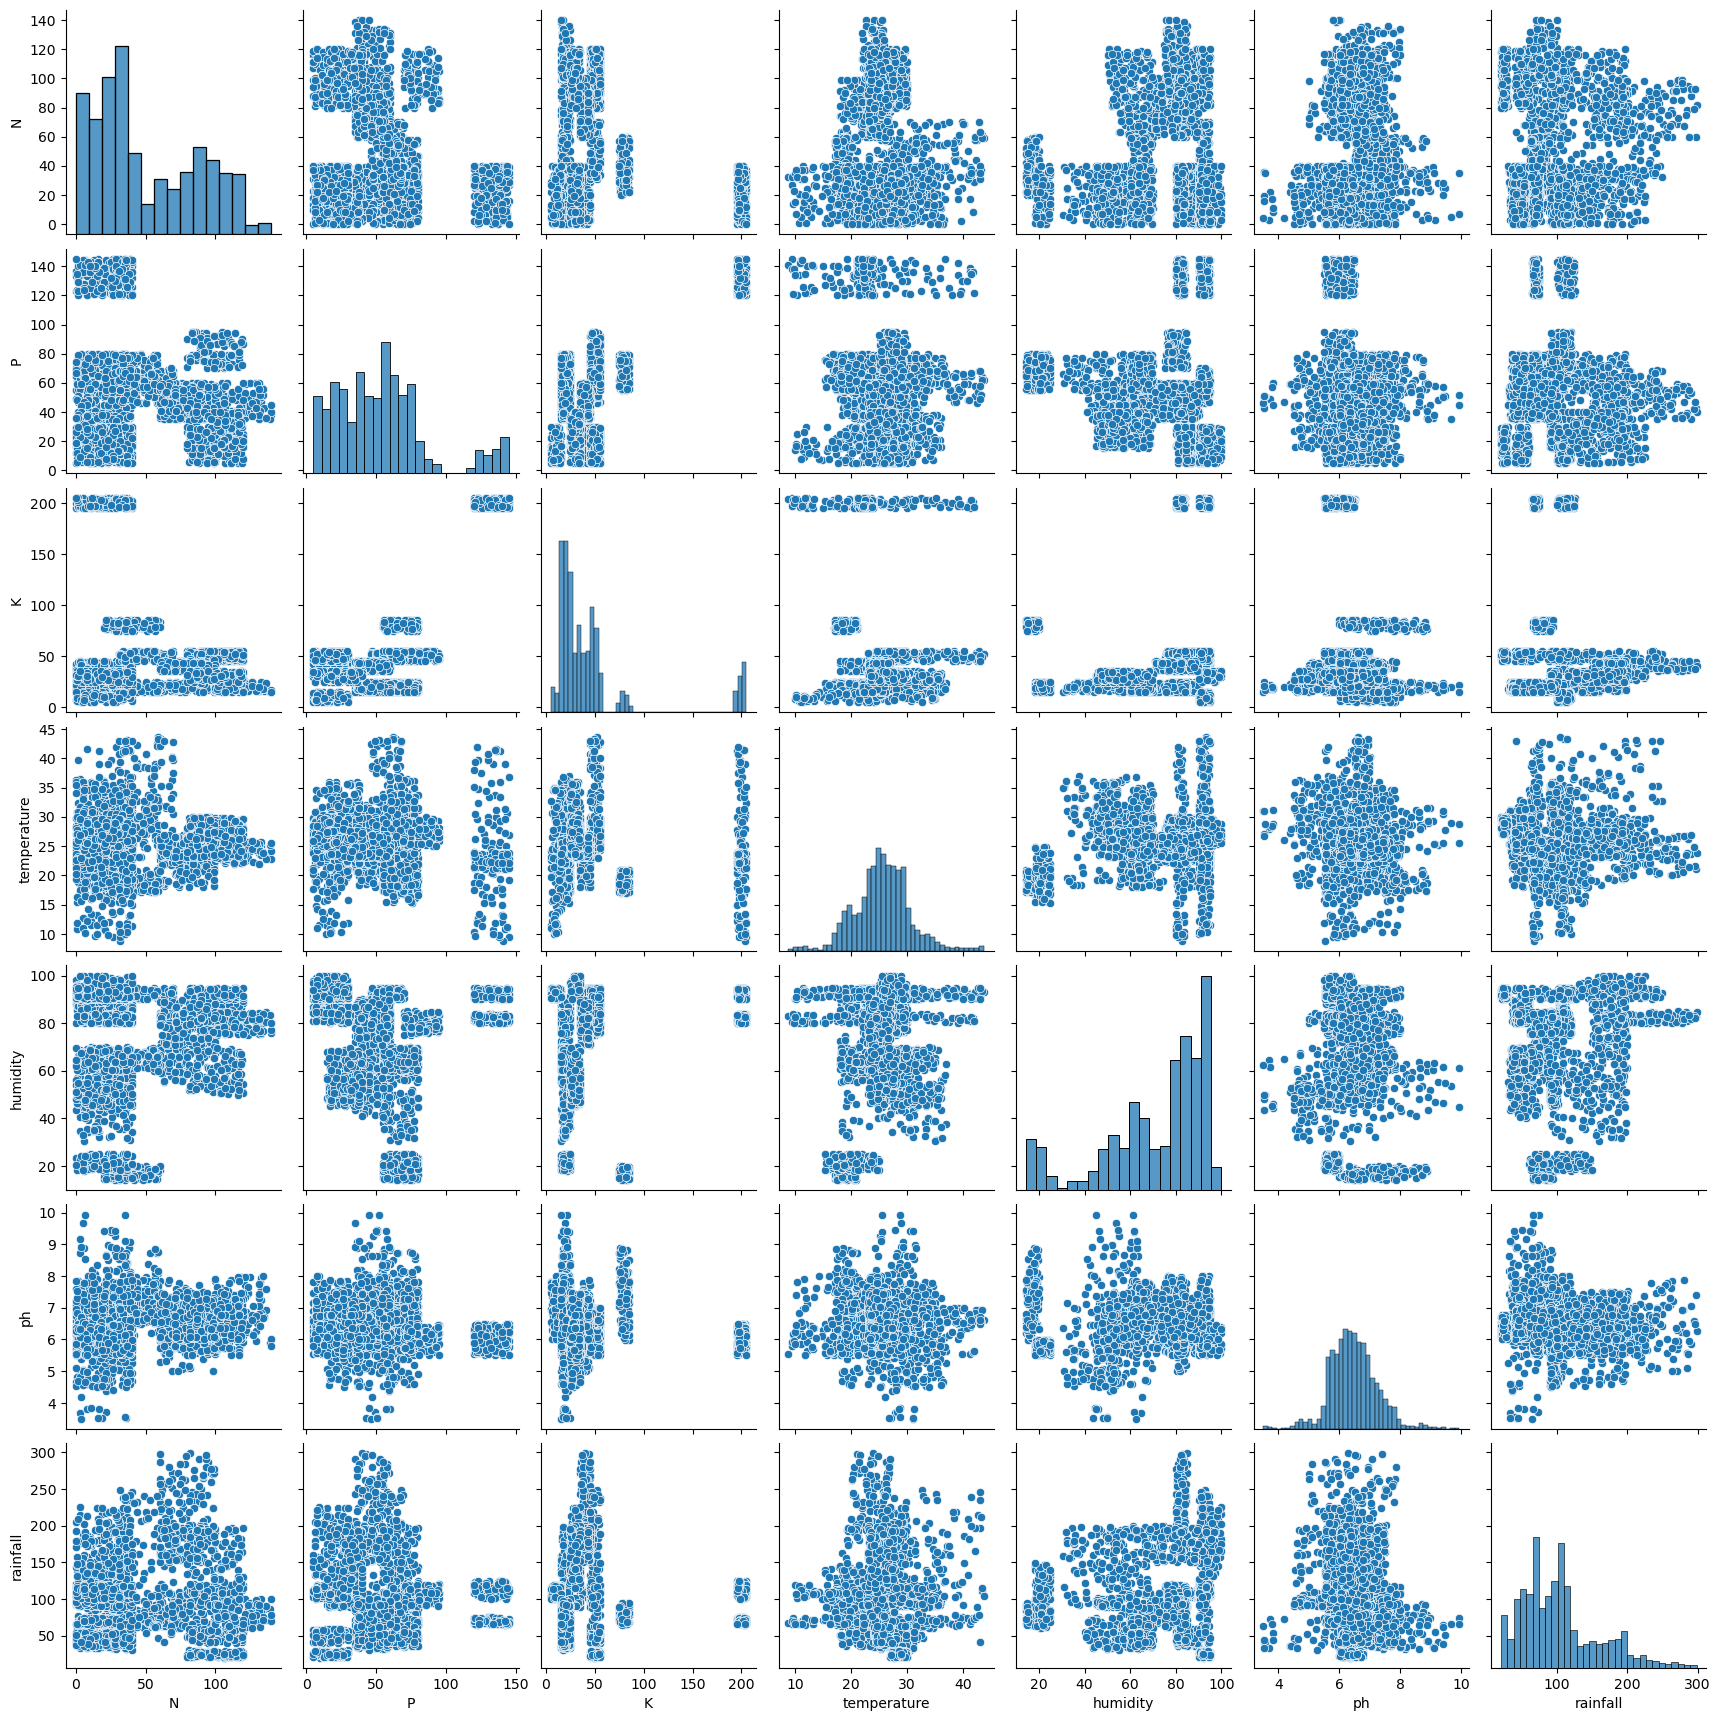

In [16]:
sns.pairplot(num_columns)
plt.show()

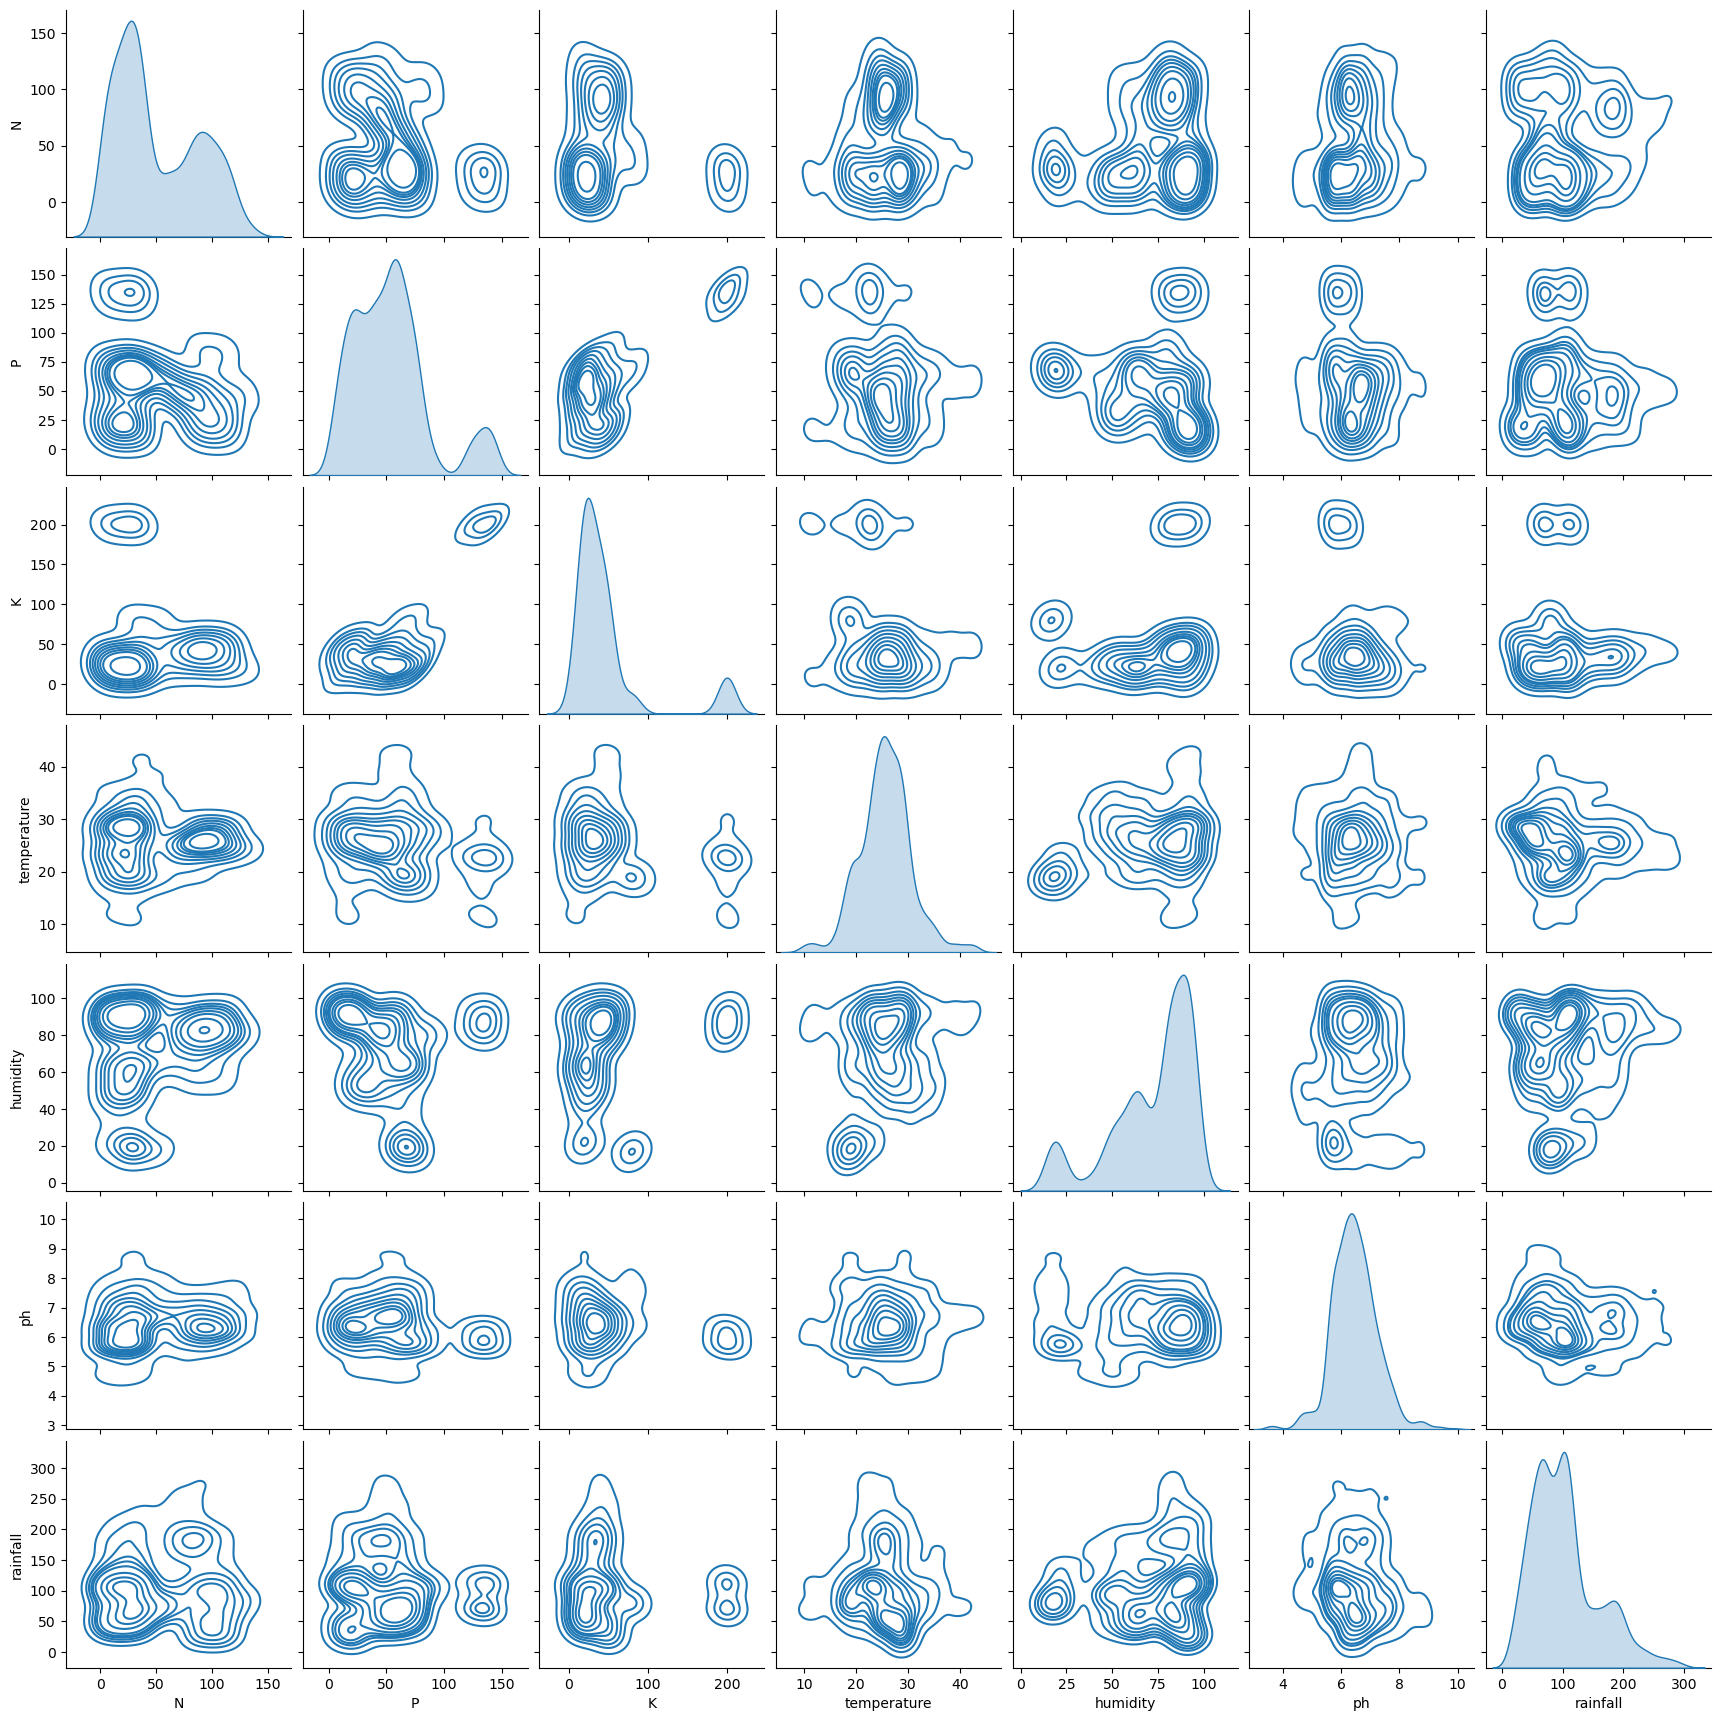

In [17]:
sns.pairplot(df,kind='kde')
plt.savefig("Farm.jpg")
plt.show()

<Axes: >

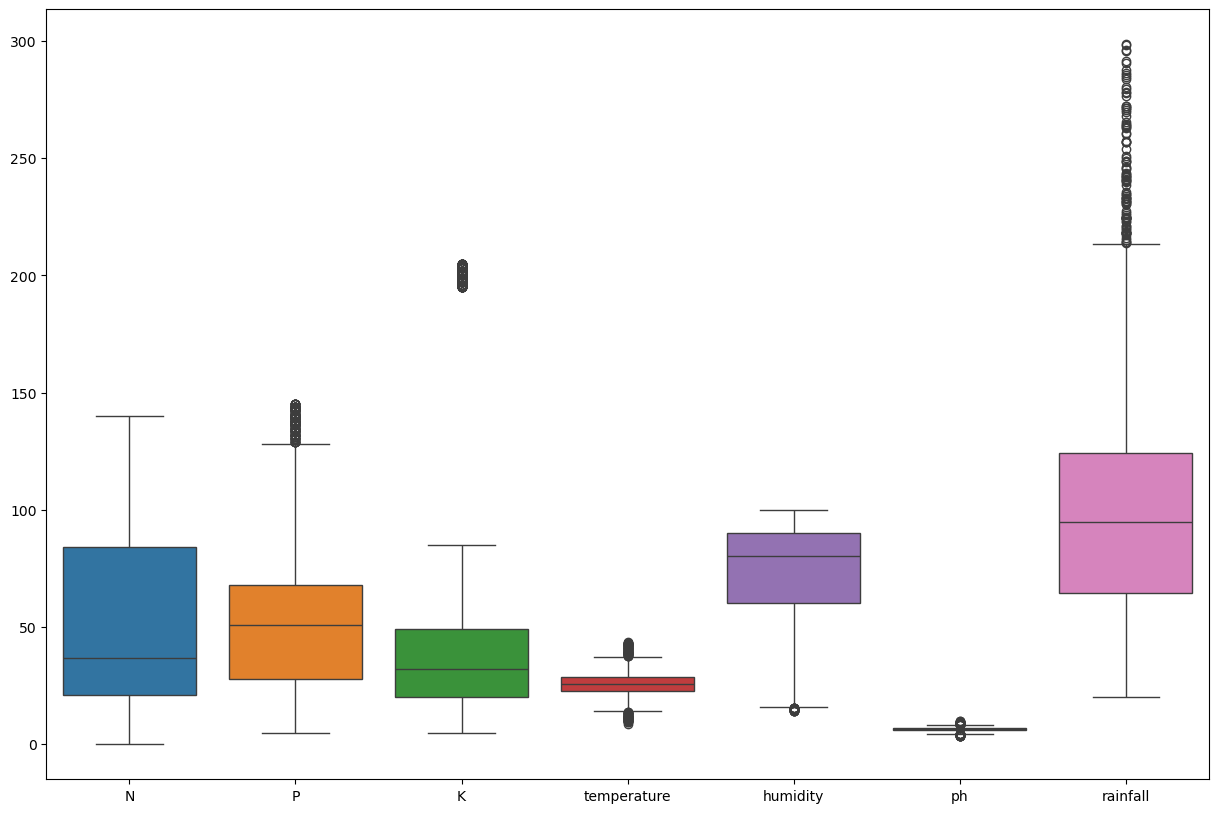

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(num_columns)

In [19]:
#Using IQR to remove outliers from P,K,temperature,humidity ,ph, rainfall

In [20]:
df["P"].unique()[:4]

array([42, 58, 55, 35], dtype=int64)

In [21]:
Q1p,Q3p = df.P.quantile([0.25,0.75])

In [22]:
IQRp = (Q3p - Q1p)

In [23]:
lower_limitp = (Q1p - 1.5*IQRp)
upper_limitp = (Q3p + 1.5*IQRp)

In [24]:
p_outliers = df[(df.P < lower_limitp) | (df.P > upper_limitp)]
p_outliers.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1517,37,137,199,22.639464,90.184516,5.697946,108.340588,apple
1277,16,130,201,29.120338,82.790929,5.682395,68.850305,grapes
1259,17,136,195,41.207336,81.610510,6.389783,65.902275,grapes
1513,9,139,199,23.252308,94.541283,5.867421,105.355841,apple
1217,3,136,205,17.586294,80.848066,6.334771,71.406545,grapes


In [25]:
mask_p = ((df.P > lower_limitp) & (df.P < upper_limitp))

In [26]:
#K outliers removal

In [27]:
Q1k,Q3k = df.K.quantile([0.24,0.75])
IQRk = (Q3k - Q1k)
lower_limitk = (Q1k - 1.5*IQRk)
upper_limitk = (Q3k + 1.5*IQRk)
mask_k = ((df.K > lower_limitk) & (df.K < upper_limitk))

In [28]:
#Outliers removal from temperature using IQR

In [29]:
Q1t,Q3t = df.temperature.quantile([0.24,0.75])

In [30]:
IQRt = (Q3t - Q1t)

In [31]:
lower_limitT = (Q1t - 1.5*IQRt)
upper_limitT = (Q3t + 1.5*IQRt)


In [32]:
mask_temp = ((df.temperature > lower_limitT) & (df.temperature < upper_limitT))

In [33]:
#Humidity

In [34]:
Q1hum,Q3hum = df.humidity.quantile([0.24,0.75])
IQRhum = (Q3hum - Q1hum)
lower_limithum = (Q1hum - 1.5*IQRhum)
upper_limithum = (Q3hum + 1.5*IQRhum)
mask_hum = ((df.humidity > lower_limithum) & (df.humidity < upper_limithum))

In [35]:
humidity_outliers = df[((df.humidity < lower_limithum) | (df.humidity > upper_limithum))]
humidity_outliers

,N,P,K,temperature,humidity,ph,rainfall,label


In [36]:
#PH

In [37]:
Q1ph,Q3ph = df.ph.quantile([0.24,0.75])
IQRph = (Q3ph - Q1ph)
lower_limitph = (Q1ph - 1.5*IQRph)
upper_limitph = (Q3ph + 1.5*IQRph)
mask_ph = ((df.ph > lower_limitph) & (df.ph < upper_limitph))

In [38]:
#Rainfall

In [39]:
Q1rain,Q3rain = df.rainfall.quantile([0.24,0.75])
IQRrain = (Q3rain - Q1rain)
lower_limitrain = (Q1rain - 1.5*IQRrain)
upper_limitrain = (Q3rain + 1.5*IQRrain)
mask_rain = ((df.rainfall > lower_limitrain) & (df.rainfall < upper_limitrain))

In [40]:
df = df[mask_p & mask_temp & mask_hum & mask_ph & mask_rain & mask_k]

<Axes: >

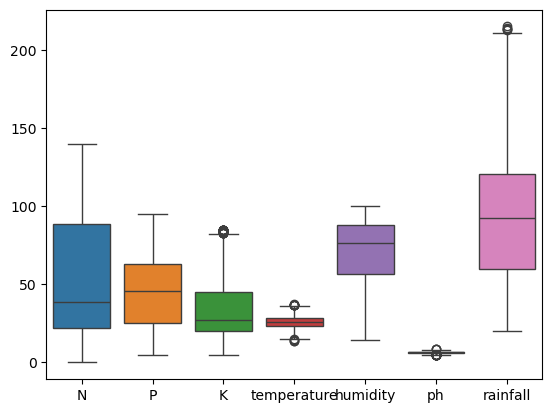

In [41]:
sns.boxplot(df)

In [42]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [43]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [44]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [45]:
df.label.nunique()

20

In [46]:
pie_crops = df.groupby("label")["label"].value_counts()

In [47]:
labels= ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee']

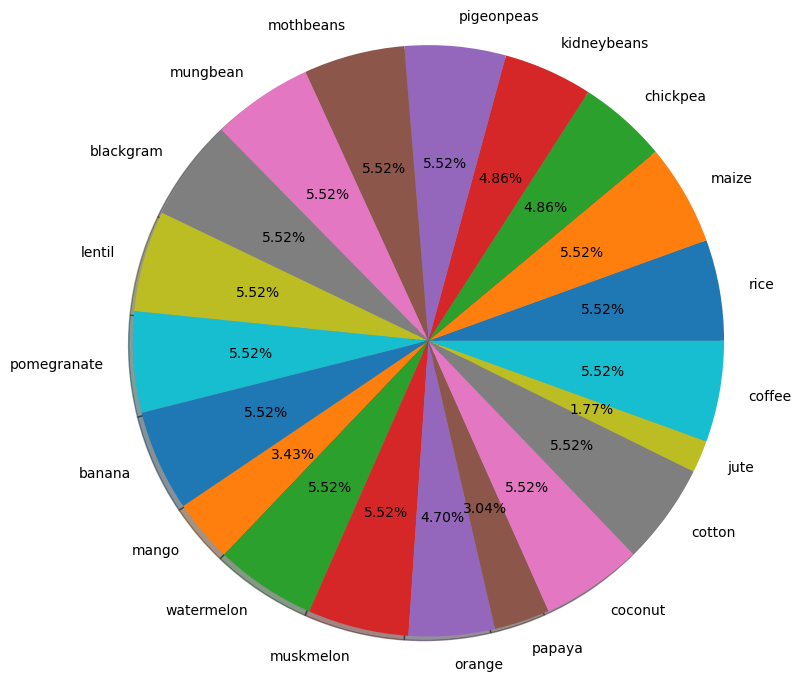

In [48]:
plt.pie(pie_crops,autopct="%.2f%%",radius=2,labels=labels,shadow=True)
plt.show()

In [49]:
#Building the model

In [50]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1469,95,30,52,29.480699,90.336987,6.640471,26.036577,muskmelon
22,67,59,41,21.947667,80.973842,6.012633,213.356092,rice
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1011,101,87,54,29.073111,76.500452,6.376757,100.169264,banana


In [51]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error


In [52]:
from sklearn.decomposition import PCA

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.compose import ColumnTransformer

# ModeL Building

In [55]:
X = df.drop("label",axis=1)
y = df.label

In [56]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=30)

In [57]:
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=25)

In [58]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [59]:
num_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [60]:
numerical_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy='mean')),
    ("scale",StandardScaler())
    
    
])

In [61]:
transformer = ColumnTransformer(transformers=[
    ("num_pipe",numerical_pipe,num_columns)
],
    remainder='drop',
    n_jobs=-1
)

In [62]:
voting = VotingClassifier(estimators=[
    ("XGB",XGBClassifier()),
    ("Rforest",RandomForestClassifier(n_estimators=100,)),
    ("GBoost",GradientBoostingClassifier(n_estimators=100)),
    ("Dtree",DecisionTreeClassifier()),
    ("GNB",GaussianNB())
    
],
    voting='soft'                      
                         
                        )

In [63]:
mk_model = make_pipeline(transformer,voting)

In [64]:
mk_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('XGB',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_byle...
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                              ('Rforest',
                                               RandomForestClassifier()),
                                              ('GBoost',
                                               GradientBoostingClassifier()),
                                              ('Dtree',
                                               DecisionTreeClassifier()),
                                              ('GNB', GaussianNB())],
                                  voting='soft'))])

In [65]:
mk_model.score(X_val,y_val)

0.988929889298893

In [66]:
#Evaluating the model

In [67]:
y_predict = mk_model.predict(X_test)

In [68]:
cm = confusion_matrix(y_test,y_predict)

In [69]:
cr = classification_report(y_test,y_predict)

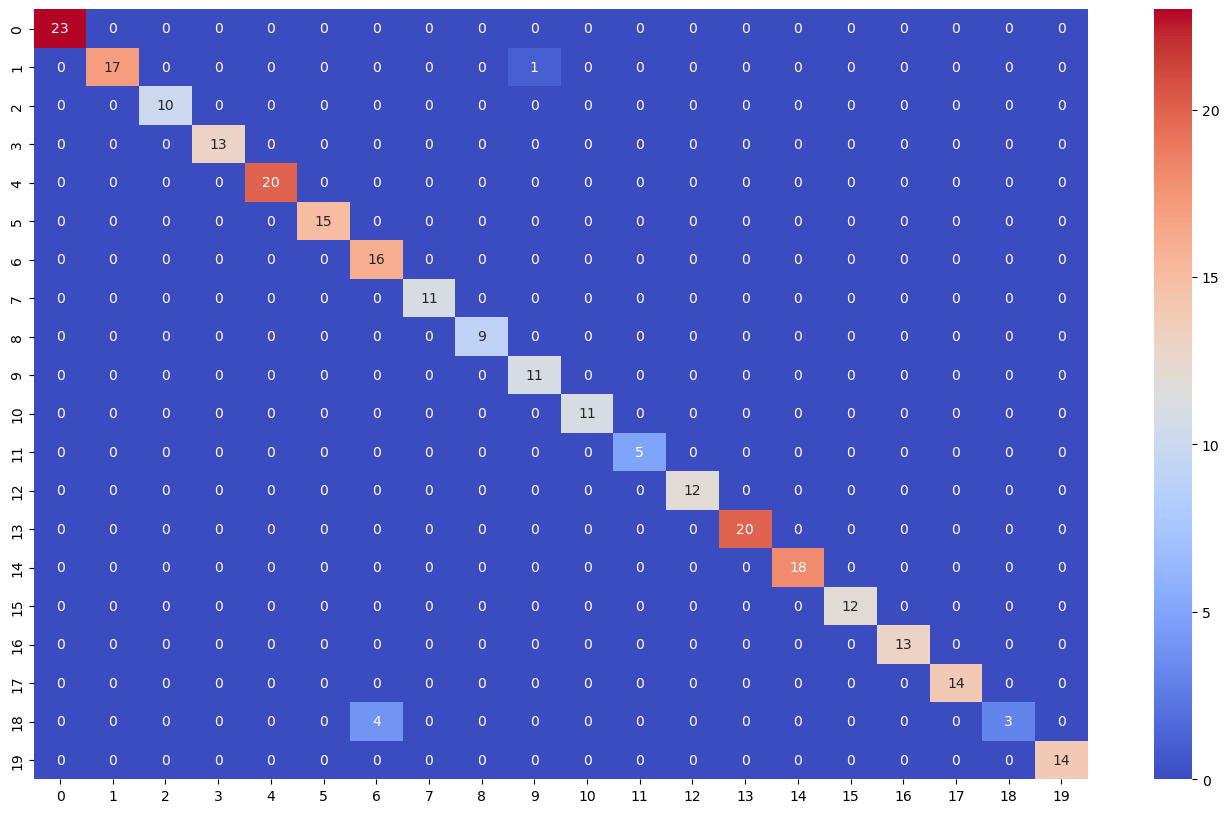

In [70]:
plt.figure(figsize=(17,10))
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.show()

In [71]:
print(cr)

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        23
   blackgram       1.00      0.94      0.97        18
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        15
        jute       0.80      1.00      0.89        16
 kidneybeans       1.00      1.00      1.00        11
      lentil       1.00      1.00      1.00         9
       maize       0.92      1.00      0.96        11
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      1.00      1.00         5
    mungbean       1.00      1.00      1.00        12
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        18
      papaya       1.00      1.00      1.00        12
  pigeonpeas       1.00      1.00      1.00        13
 pomegranate       1.00    

In [72]:
#Saving the model using joblib

In [73]:
import joblib as jb

In [74]:
crop_model = jb.dump(mk_model,"crop-recommendation.pkl")

In [75]:
crop_model = jb.load("crop-recommendation.pkl")

# Testing the model

In [77]:
X_test[10:15]

,N,P,K,temperature,humidity,ph,rainfall
1303,114,8,50,24.746313,88.308663,6.581588,57.958261
1647,9,10,10,22.355105,93.522119,6.010392,101.516459
974,15,6,41,19.008707,88.837681,6.897368,108.679398
1168,33,31,34,31.329956,50.222876,5.421265,89.782162
1409,108,26,52,28.826290,94.267653,6.201798,26.238385


In [78]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [79]:
X_test[10:15], "------------------" ,y_test[10:15]

(      N   P   K  temperature   humidity        ph    rainfall
 10  114   8  50    24.746313  88.308663  6.581588   57.958261
 11    9  10  10    22.355105  93.522119  6.010392  101.516459
 12   15   6  41    19.008707  88.837681  6.897368  108.679398
 13   33  31  34    31.329956  50.222876  5.421265   89.782162
 14  108  26  52    28.826290  94.267653  6.201798   26.238385,
 '------------------',
 10     watermelon
 11         orange
 12    pomegranate
 13          mango
 14      muskmelon
 Name: label, dtype: object)

In [80]:
crop_model.predict(X_test)[10]

'watermelon'

In [81]:
crop_model.predict(X_test[10:15])

array(['watermelon', 'orange', 'pomegranate', 'mango', 'muskmelon'],
      dtype=object)

In [82]:
y_test[10:15]

10     watermelon
11         orange
12    pomegranate
13          mango
14      muskmelon
Name: label, dtype: object